In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

The QM ligand is CHA

In [6]:
df_NVT = pd.read_csv("../Outputs/NVT-1.ener",header=None,sep="\s+")
df_NVT = df_NVT.iloc[1:,:7]
df_NVT.columns = ["Step Nr.", "Time[fs]","Kin[a.u.]","Temp[K]","Pot.[a.u.]","Cons Qty[a.u.]","UsedTime[s]"]

df_NVT = df_NVT.astype({
    "Step Nr.": "int",
    "Time[fs]": "float",
    "Kin[a.u.]": "float",
    "Temp[K]": "float",
    "Pot.[a.u.]": "float",
    "Cons Qty[a.u.]": "float",
    "UsedTime[s]": "float"
})

df_NVT

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_533388/2728203646.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_NVT = pd.read_csv("../Outputs/NVT-1.ener",header=None,sep="\s+")


,Step Nr.,Time[fs],Kin[a.u.],Temp[K],Pot.[a.u.],Cons Qty[a.u.],UsedTime[s]
1,0,0.0,71.038787,298.000000,-341.304174,-270.265387,0.000000
2,1,0.5,67.808256,284.448272,-337.713187,-270.064937,1.084422
3,2,1.0,60.713738,254.687538,-329.900930,-269.669622,0.303056
4,3,1.5,55.406526,232.424362,-323.723054,-269.469951,0.284599
5,4,2.0,54.454305,228.429898,-322.195686,-269.622588,0.287809
...,...,...,...,...,...,...,...
9997,9996,4998.0,71.329935,299.221332,-259.676576,-269.541126,0.275792
9998,9997,4998.5,71.266297,298.954381,-259.608007,-269.535678,0.276409
9999,9998,4999.0,71.105412,298.279483,-259.470525,-269.527327,0.526953
10000,9999,4999.5,70.945576,297.608991,-259.390264,-269.526101,0.282379


In [7]:
df_NPT = pd.read_csv("../Outputs/NPT-1.ener",header=None,sep="\s+")
df_NPT = df_NPT.iloc[1:,:7]
df_NPT.columns = ["Step Nr.", "Time[fs]","Kin[a.u.]","Temp[K]","Pot.[a.u.]","Cons Qty[a.u.]","UsedTime[s]"]
df_NPT.astype("float")
# Convert all columns (except Step Nr.) to float
df_NPT = df_NPT.astype({
    "Step Nr.": "int",
    "Time[fs]": "float",
    "Kin[a.u.]": "float",
    "Temp[K]": "float",
    "Pot.[a.u.]": "float",
    "Cons Qty[a.u.]": "float",
    "UsedTime[s]": "float"
})
df_NPT

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_533388/2018958399.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_NPT = pd.read_csv("../Outputs/NPT-1.ener",header=None,sep="\s+")


,Step Nr.,Time[fs],Kin[a.u.],Temp[K],Pot.[a.u.],Cons Qty[a.u.],UsedTime[s]
1,0,0.0,71.017893,297.912353,-259.385960,-269.518620,0.000000
2,1,0.5,70.889400,297.373337,-259.354010,-269.524747,1.028806
3,2,1.0,70.546706,295.935774,-259.217127,-269.522176,0.301171
4,3,1.5,70.529239,295.862502,-259.024260,-269.513169,0.330167
5,4,2.0,70.413938,295.378827,-258.906199,-269.506991,0.302331
...,...,...,...,...,...,...,...
49997,49996,24998.0,71.370708,299.392371,-265.354888,-269.453425,0.319815
49998,49997,24998.5,71.370441,299.391253,-265.409527,-269.455785,0.587757
49999,49998,24999.0,71.375137,299.410949,-265.451738,-269.456801,0.319691
50000,49999,24999.5,71.543129,300.115658,-265.468389,-269.455838,0.320793


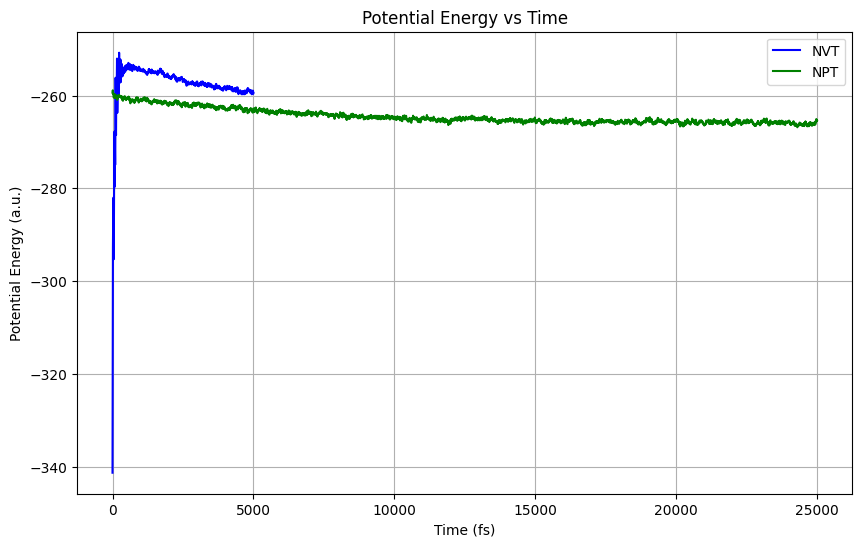

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))

# Plot NVT data
plt.plot(df_NVT["Time[fs]"][::10], df_NVT["Pot.[a.u.]"][::10], label="NVT", color="blue")

# Plot NPT data
plt.plot(df_NPT["Time[fs]"][::10], df_NPT["Pot.[a.u.]"][::10], label="NPT", color="green")

# Add labels and legend
plt.title("Potential Energy vs Time")
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u.)")
plt.legend()
plt.grid()

plt.show()
plt.savefig("../Figures/NVT_NPT.png")


In [9]:
# QM/MM plot
df_QMMM = pd.read_csv("../Outputs/monitor/MONITOR-1.ener",header=None,sep="\s+")
df_QMMM = df_QMMM.iloc[1:,:7]
df_QMMM.columns = ["Step Nr.", "Time[fs]","Kin[a.u.]","Temp[K]","Pot.[a.u.]","Cons Qty[a.u.]","UsedTime[s]"]

df_QMMM = df_QMMM.astype({
    "Step Nr.": "int",
    "Time[fs]": "float",
    "Kin[a.u.]": "float",
    "Temp[K]": "float",
    "Pot.[a.u.]": "float",
    "Cons Qty[a.u.]": "float",
    "UsedTime[s]": "float"
})

df_QMMM

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_533388/1780559901.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_QMMM = pd.read_csv("../Outputs/monitor/MONITOR-1.ener",header=None,sep="\s+")


,Step Nr.,Time[fs],Kin[a.u.],Temp[K],Pot.[a.u.],Cons Qty[a.u.],UsedTime[s]
1,0,0.0,71.590273,300.313424,-387.485380,-315.894635,0.000000
2,1,0.5,71.661531,300.612342,-387.560885,-315.897022,7.198538
3,2,1.0,71.821417,301.283046,-387.729683,-315.904039,0.977943
4,3,1.5,71.964089,301.881543,-387.879568,-315.909312,0.901550
5,4,2.0,72.007900,302.065323,-387.924410,-315.908356,0.920375
...,...,...,...,...,...,...,...
9997,9996,4998.0,70.868305,297.284847,-386.621851,-315.891932,0.973849
9998,9997,4998.5,70.917689,297.492005,-386.675533,-315.895763,0.972833
9999,9998,4999.0,70.989183,297.791915,-386.753025,-315.901297,1.045948
10000,9999,4999.5,71.007312,297.867965,-386.772015,-315.901695,0.927152


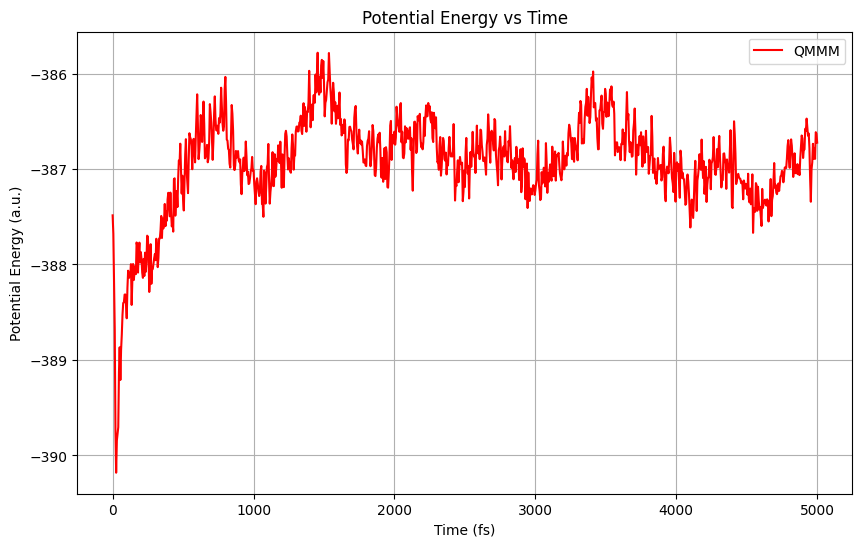

In [10]:
plt.figure(figsize=(10, 6))
# Plot QMMM data
plt.plot(df_QMMM["Time[fs]"][::10],df_QMMM["Pot.[a.u.]"][::10], label="QMMM", color="red")

# Add labels and legend
plt.title("Potential Energy vs Time")
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u.)")
plt.legend()
plt.grid()

plt.show()


## Part 4 QM/MM plus metadynamics

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_533388/1473163012.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_QMMM_metad_RC = pd.read_csv("../Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog",header=None,sep="\s+",


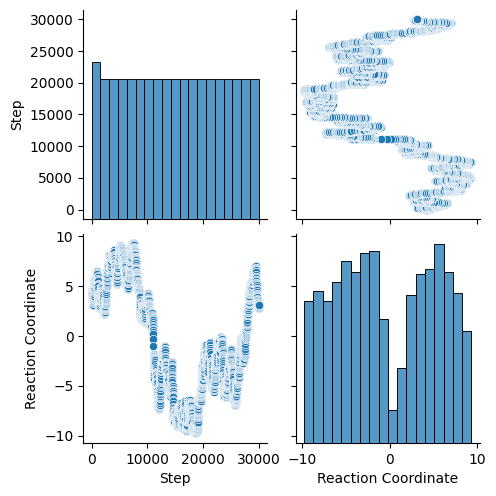

In [21]:
# Outputs/metad1_initmonitor
# QM/MM plot
df_QMMM_metad_RC = pd.read_csv("../Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog",header=None,sep="\s+",
                               usecols=[0,1],
                               names=['Step','Reaction Coordinate'])

sns.pairplot(data=df_QMMM_metad_RC)

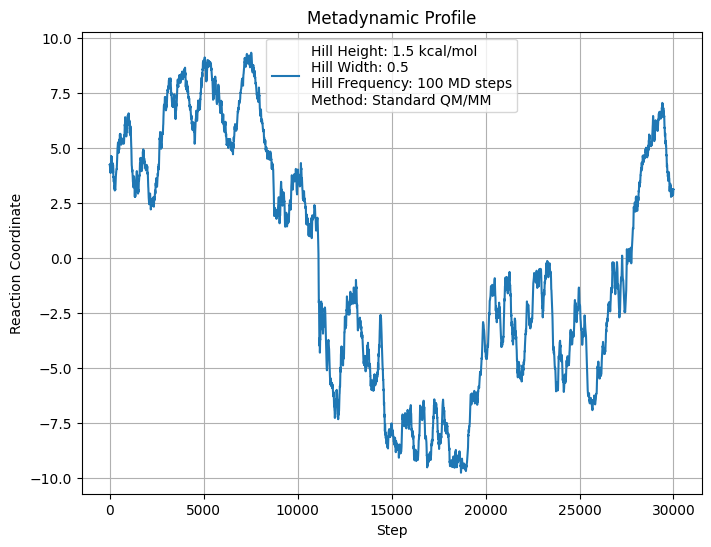

In [26]:
# Parameters from the .inp file
hill_height = 1.5  # kcal/mol
hill_width = 0.5   # scale
hill_frequency = 100  # MD steps
method = "Standard QM/MM"

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(df_QMMM_metad_RC['Step'],df_QMMM_metad_RC['Reaction Coordinate'], label=f"Hill Height: {hill_height} kcal/mol\nHill Width: {hill_width}\nHill Frequency: {hill_frequency} MD steps\nMethod: {method}")
plt.title("Metadynamic Profile")
plt.xlabel("Step")
plt.ylabel("Reaction Coordinate")
plt.legend(loc="best", fontsize=10)
plt.grid()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_533388/2350622543.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_QMMM_metad_RC_2 = pd.read_csv("/scratch/fh2268/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor_freqhills/METADYN-COLVAR.metadynLog",header=None,sep="\s+",


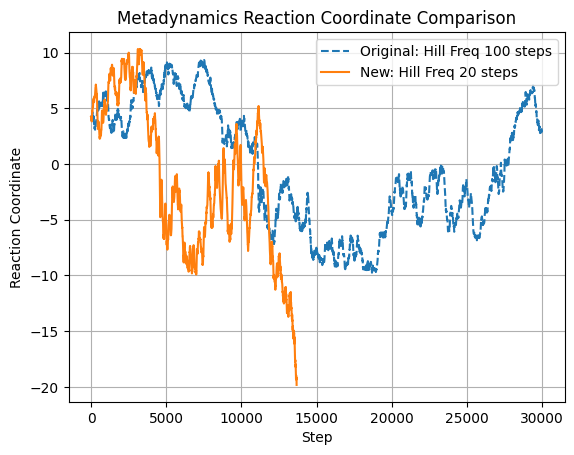

In [28]:
# QM/MM plot
df_QMMM_metad_RC_2 = pd.read_csv("/scratch/fh2268/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor_freqhills/METADYN-COLVAR.metadynLog",header=None,sep="\s+",
                               usecols=[0,1],
                               names=['Step','Reaction Coordinate'])
# Plot the original simulation
plt.plot(df_QMMM_metad_RC['Step'],df_QMMM_metad_RC['Reaction Coordinate'], label="Original: Hill Freq 100 steps", linestyle='--')

# Plot the new simulation
plt.plot(df_QMMM_metad_RC_2['Step'],df_QMMM_metad_RC_2['Reaction Coordinate'], label="New: Hill Freq 20 steps", linestyle='-')

# Add titles and labels
plt.title("Metadynamics Reaction Coordinate Comparison")
plt.xlabel("Step")
plt.ylabel("Reaction Coordinate")
plt.legend(loc="best", fontsize=10)
plt.grid()
plt.show()


In [31]:
import MDAnalysis as mda

# Load trajectory and topology
u = mda.Universe("../Outputs/metad1_initmonitor_freqhills/complex_LJ_mod.prmtop", "../Outputs/metad1_initmonitor_freqhills/METADYN-pos-1.xyz")

# Select the "before" and "after" frames (first and last)
before_frame = u.trajectory[0]   # First frame
after_frame = u.trajectory[-1]   # Last frame

# Save "before" and "after" frames to PDB format
u.trajectory[0]
u.atoms.write("../Figures/before_reaction.pdb")

u.trajectory[-1]
u.atoms.write("../Figures/after_reaction.pdb")



/scratch/fh2268/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/scratch/fh2268/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/scratch/fh2268/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/scratch/fh2268/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/scratch/fh2268/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: User